In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

load the dataset

In [4]:
boston=load_boston()

 Data is in dictionary, Populate dataframe with data key

In [5]:
df=pd.DataFrame(boston.data)

Columns are indexed, Fill in Column names with feature_names key

In [6]:
df.columns=boston.feature_names

We need Median Value! boston.data contains only the features, no price value.

In [7]:
df["MEDV"]=pd.DataFrame(boston.target)

In [8]:
df.shape

(506, 14)

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# DATA PREPROCESSING

There are values of 0 which can also be missing values.
For good measure, we’ll turn the 0 values into np.nan where we can see what is missing.


In [11]:
df.replace(0.0,np.nan,inplace=True)

In [12]:
df.shape

(506, 14)

In [13]:
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

73% of the ZN feature and 93% of CHAS feature are missing,hence we will leave them

In [14]:
df.drop('ZN',axis=1,inplace=True)
df.drop('CHAS',axis=1,inplace=True)
df.shape

(506, 12)

Machine learning algorithms like linear regression, logistic regression, neural network, etc. 
that use gradient descent as an optimization technique require data to be scaled

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

scaler=MinMaxScaler()

In [16]:
print(df.head())

      CRIM  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  \
0  0.00632   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   
1  0.02731   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   
2  0.02729   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   
3  0.03237   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   
4  0.06905   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [17]:
features=df.drop('MEDV',1).columns
tr=make_column_transformer((scaler,["MEDV"]))
y=tr.fit_transform(df)
n=len(y)
y=[round(y[i][0],4) for i in range(n)]    

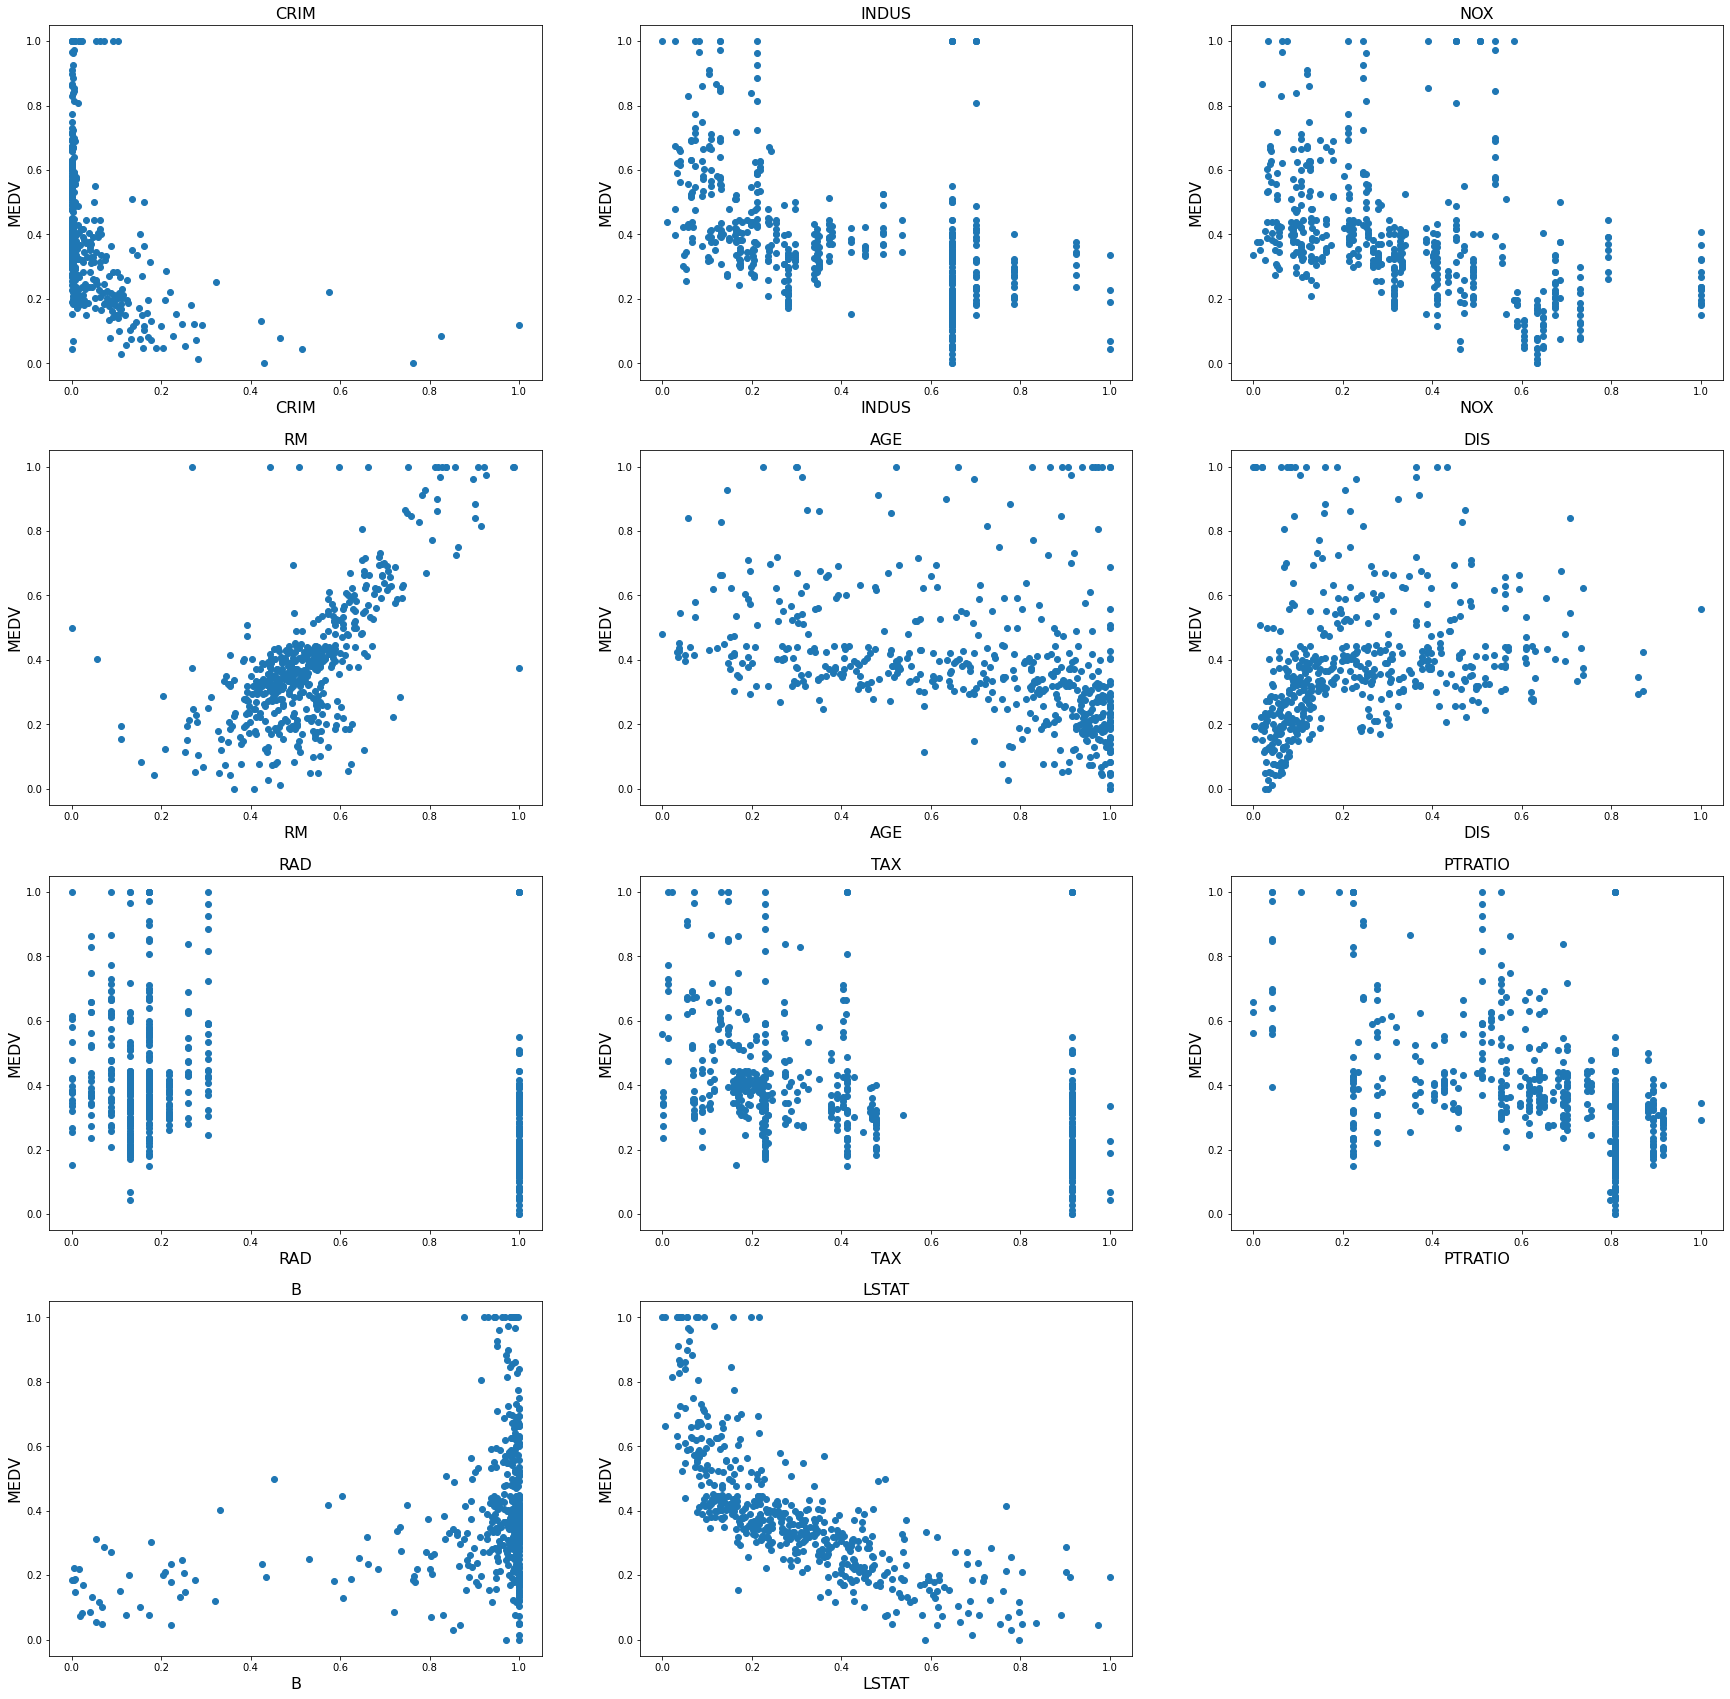

In [18]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(30,30))
for index,feature_name in enumerate(features):
    mpl.subplot(4,3,index+1)
    tr=make_column_transformer((scaler,[feature_name]))
    x=tr.fit_transform(df)
    n=len(x)
    x=[round(x[i][0],4) for i in range(n)]  
    mpl.scatter(x,y)
    mpl.title(feature_name,fontsize=16)
    mpl.xlabel(feature_name,fontsize=16)
    mpl.ylabel("MEDV",fontsize=16)

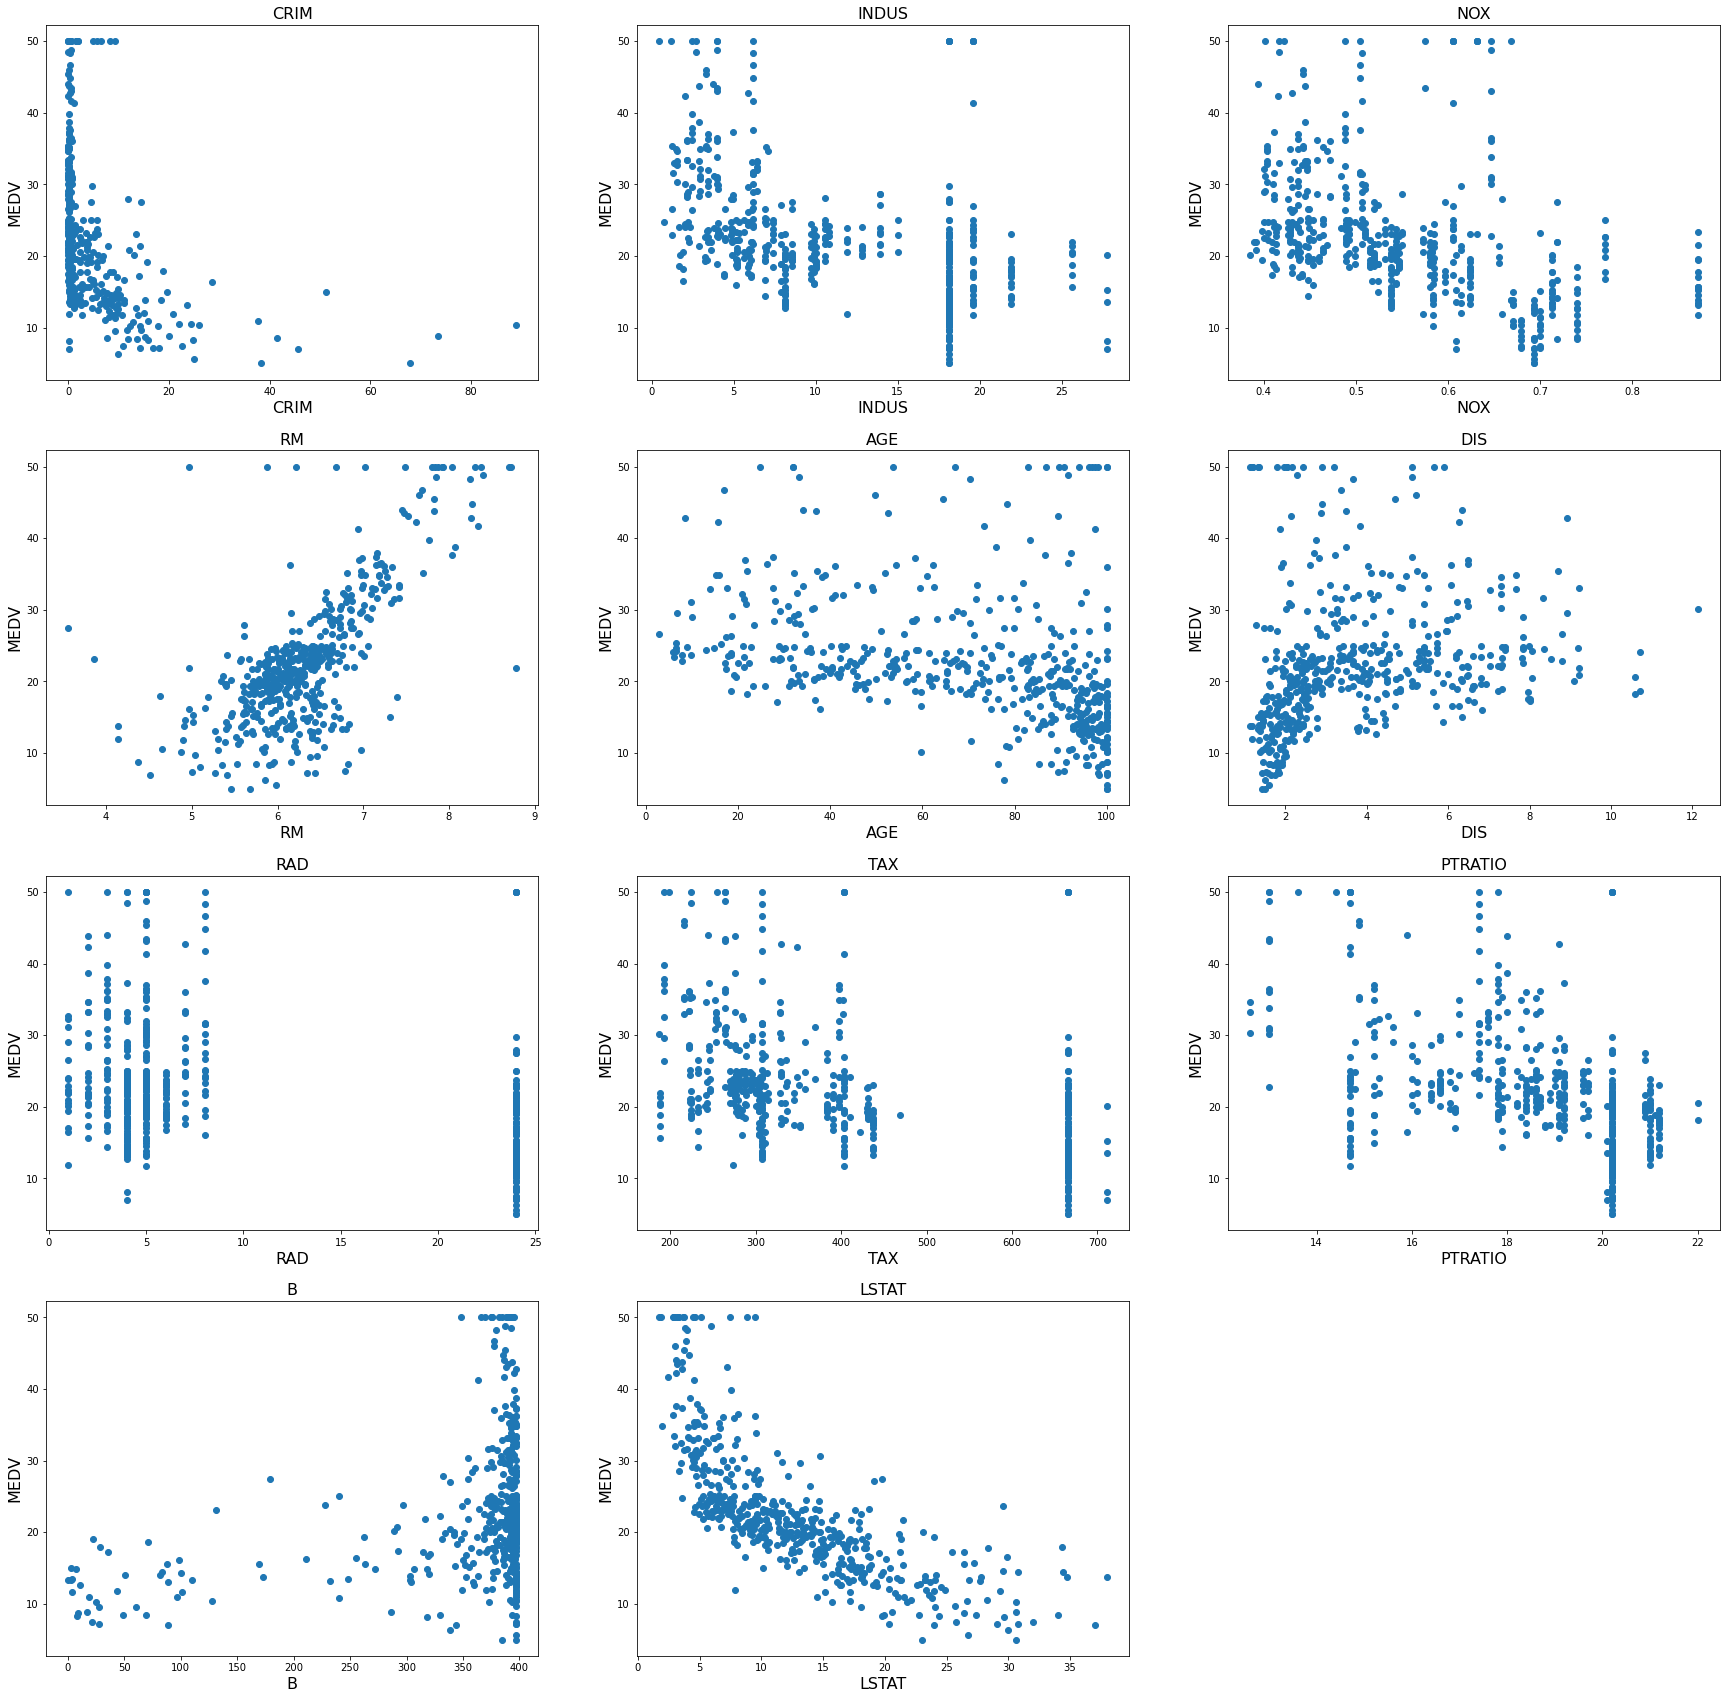

In [19]:
mpl.figure(figsize=(30,30))
for index,feature_name in enumerate(features):
    mpl.subplot(4,3,index+1)
    mpl.scatter(df[feature_name],df["MEDV"])
    mpl.title(feature_name,fontsize=16)
    mpl.xlabel(feature_name,fontsize=16)
    mpl.ylabel("MEDV",fontsize=16)

# model building

In [20]:
import statsmodels.api as sm
tr=make_column_transformer((scaler,["RM"]))
x=tr.fit_transform(df)
n=len(x)
x=[round(x[i][0],4) for i in range(n)]    
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.34,random_state=10)

In [21]:
result=sm.OLS(y_tr,x_tr).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              2281.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):                   8.52e-151
Time:                        12:33:32   Log-Likelihood:                          152.58
No. Observations:                 333   AIC:                                     -303.2
Df Residuals:                     332   BIC:                                     -299.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7522      0.016     47.761      0.000       0.721       0.783
==============================================================================
Omnibus:                       61.050   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.613
Skew:                           0.758   Prob(JB):                     1.51e-47
Kurtosis:                       6.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL EVALUATION

In [22]:
y_pre=result.predict(x_te)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_te,y_pre))

0.15098406487146024

# model building using crime rate

In [23]:
tr=make_column_transformer((scaler,["CRIM"]))
x=tr.fit_transform(df)
n=len(x)
x=[round(x[i][0],4) for i in range(n)]    
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.34,random_state=10)

In [24]:
result=sm.OLS(y_tr,x_tr).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              12.13
Date:                Fri, 25 Dec 2020   Prob (F-statistic):                    0.000563
Time:                        12:33:32   Log-Likelihood:                         -184.97
No. Observations:                 333   AIC:                                      371.9
Df Residuals:                     332   BIC:                                      375.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7960      0.229      3.483      0.001       0.346       1.246
==============================================================================
Omnibus:                       22.656   Durbin-Watson:                   0.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.660
Skew:                           0.034   Prob(JB):                     1.37e-17
Kurtosis:                       5.365   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model evaluation

In [25]:
y_pre=result.predict(x_te)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_te,y_pre))

0.4539608617223822

# residual analysis(to check assumptions of regression model)

residuals must be normally distributed(validity of hypothesis test)

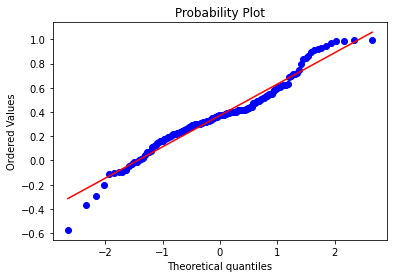

In [33]:
from scipy.stats import probplot
res=probplot(y_te-y_pre,plot=mpl,dist='norm')

residuals have constant variance(homoscedasticity)

Text(0, 0.5, 'residual')

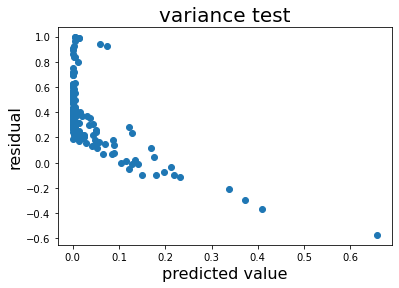

In [34]:
mpl.scatter(y_pre,y_te-y_pre)
mpl.title("variance test",fontsize=20)
mpl.xlabel("predicted value",fontsize=16)
mpl.ylabel("residual",fontsize=16)

If the above plot shows some pattern then there is functional mis specification error